In [101]:
import pandas as pd

# Load the data from the uploaded file
file_path = 'digital_currency.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'])

# Display the first few rows of the dataframe to understand its structure
data.head()

,date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


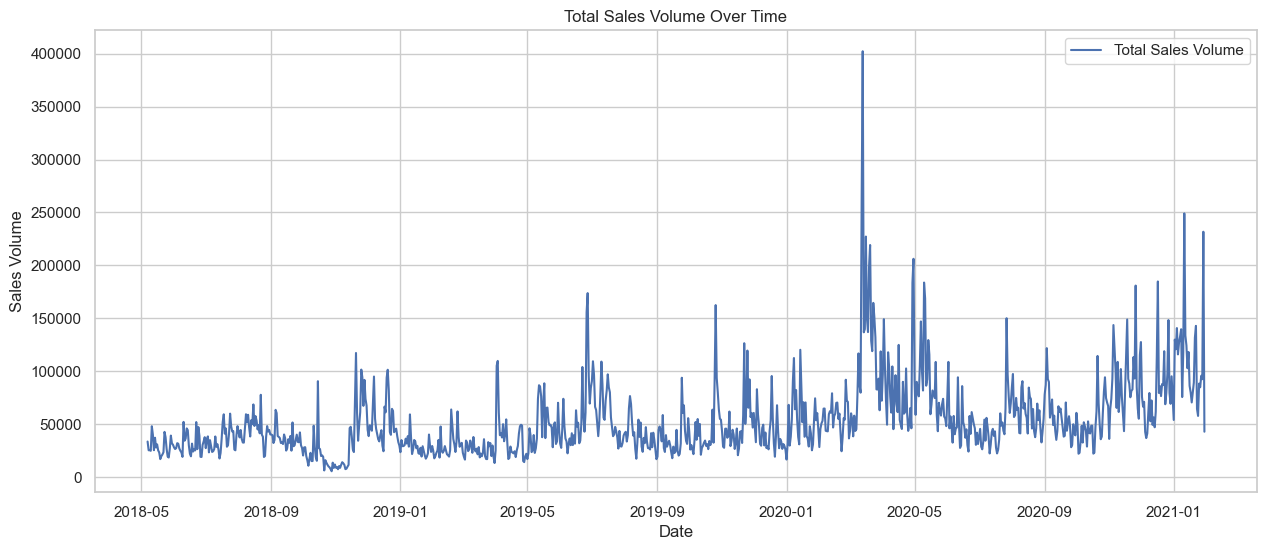

In [102]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Setting up the seaborn style for better visualization
sns.set(style="whitegrid")

# 1. Total Sales Volume
plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['volume'], label='Total Sales Volume')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Total Sales Volume Over Time')
plt.legend()
plt.show()

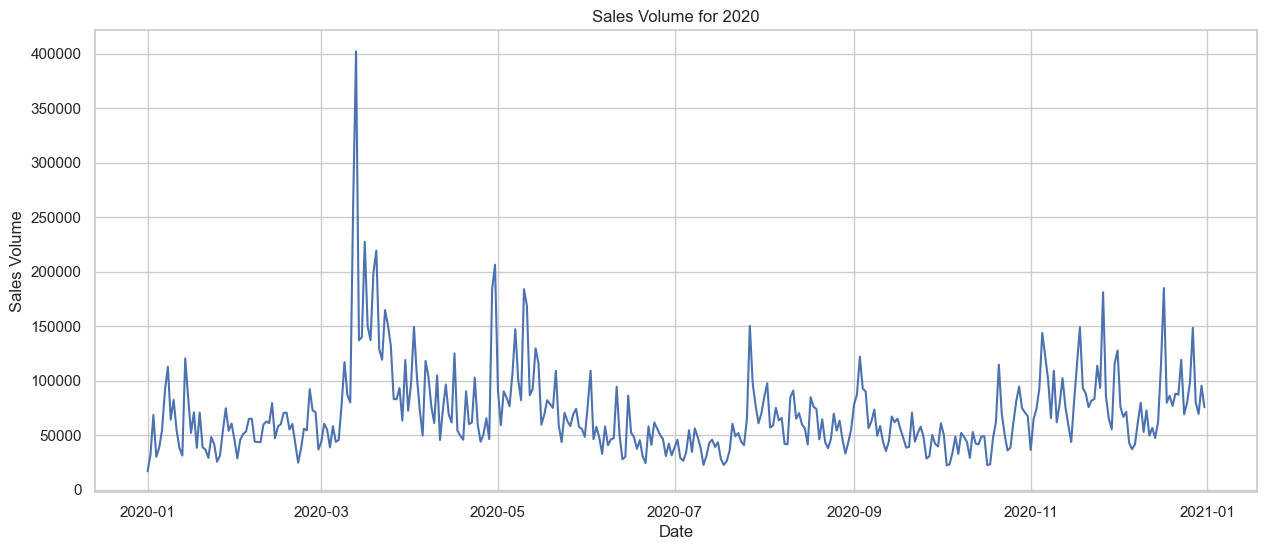

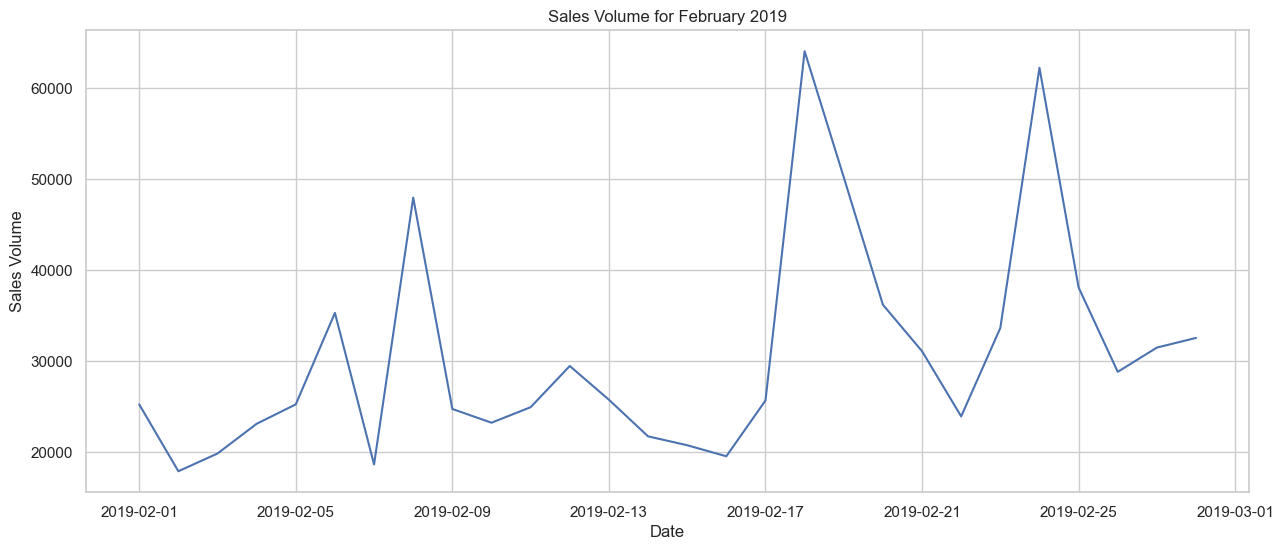

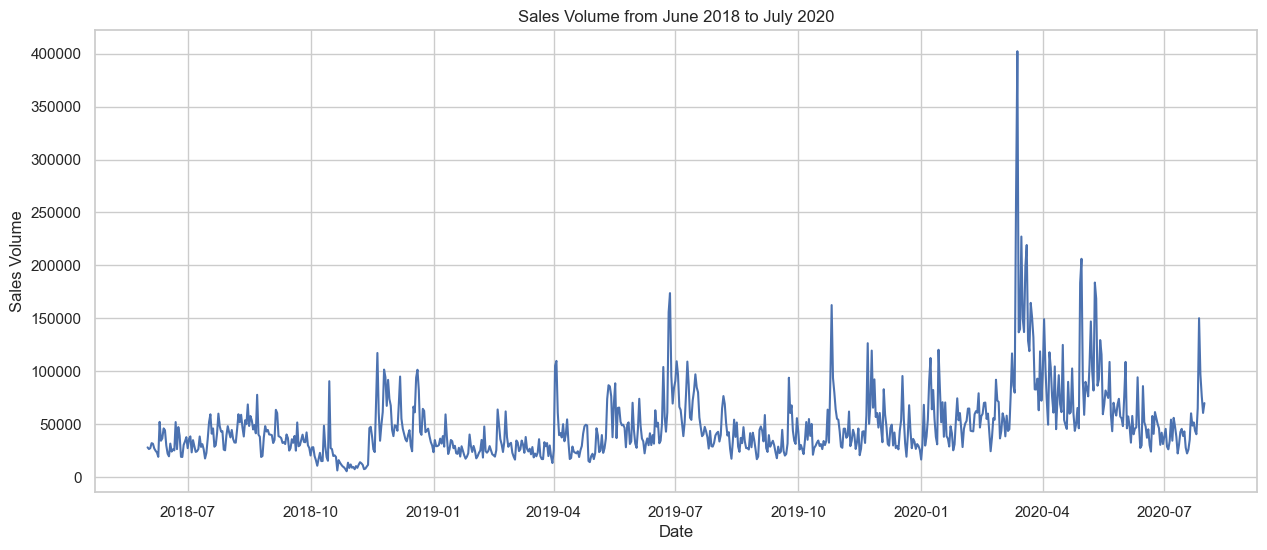

In [103]:
# Helper function to plot sales volume for specific periods
def plot_sales_volume(data, start_date=None, end_date=None, title='Sales Volume'):
    plt.figure(figsize=(15, 6))
    if start_date and end_date:
        period_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    else:
        period_data = data
    plt.plot(period_data['date'], period_data['volume'])
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.title(title)
    plt.show()

# 2. Sales Volume for 2020
plot_sales_volume(data, '2020-01-01', '2020-12-31', 'Sales Volume for 2020')

# 3. Sales Volume for February 2019
plot_sales_volume(data, '2019-02-01', '2019-02-28', 'Sales Volume for February 2019')

# 4. Sales Volume from June 2018 to July 2020
plot_sales_volume(data, '2018-06-01', '2020-07-31', 'Sales Volume from June 2018 to July 2020')


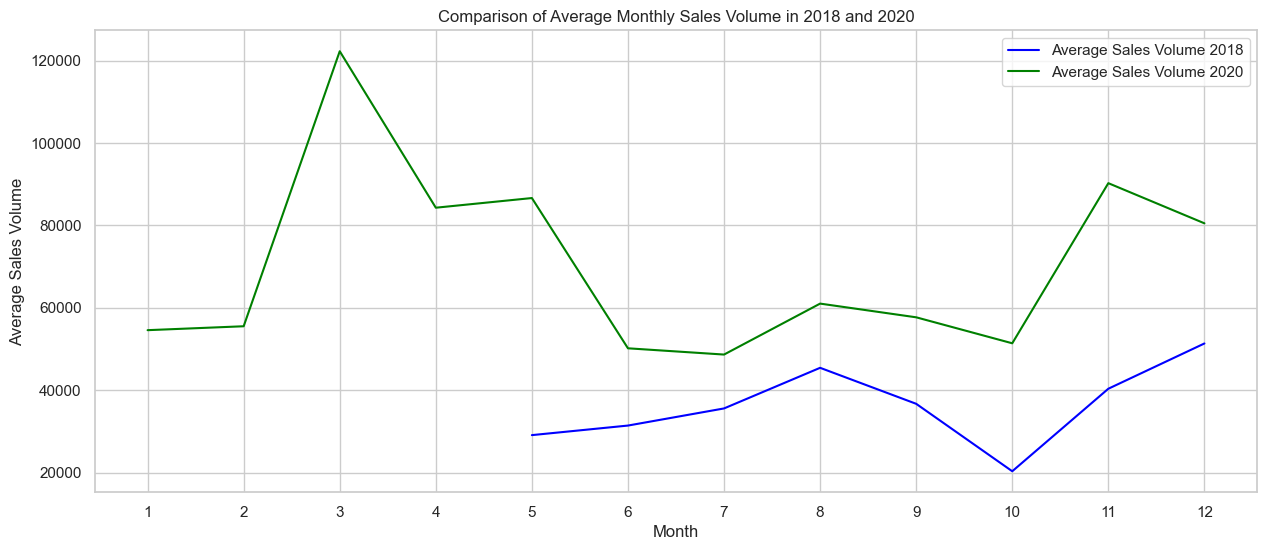

In [111]:
# Extracting month and year from the date
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Grouping data by year and month, and calculating the average sales volume
monthly_sales_2018 = data[data['year'] == 2018].groupby('month')['volume'].mean()
monthly_sales_2020 = data[data['year'] == 2020].groupby('month')['volume'].mean()

# Plotting the average monthly sales volume for 2018 and 2020
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales_2018.index, monthly_sales_2018.values, label='Average Sales Volume 2018', color='blue')
plt.plot(monthly_sales_2020.index, monthly_sales_2020.values, label='Average Sales Volume 2020', color='green')
plt.xlabel('Month')
plt.ylabel('Average Sales Volume')
plt.title('Comparison of Average Monthly Sales Volume in 2018 and 2020')
plt.xticks(range(1, 13))  # Set x-ticks to month numbers
plt.legend()
plt.show()

In [105]:
# Calculate the average closing price in USD for the year 2020
average_close_2020 = data[data['date'].dt.year == 2020]['close_USD'].mean()

average_close_2020

11110.54849726776

In [106]:
# For monthly average closing price
data['year_month'] = data['date'].dt.to_period('M')
monthly_avg_close = data.groupby('year_month')['close_USD'].mean().reset_index()

monthly_avg_close.head(50)

,year_month,close_USD
0,2018-05,8155.760400
1,2018-06,6767.169333
2,2018-07,7124.244839
3,2018-08,6675.768387
4,2018-09,6593.360667
5,2018-10,6537.378065
6,2018-11,5462.571667
7,2018-12,3670.323548
8,2019-01,3643.328387
9,2019-02,3690.157500


In [107]:
# For bi-weekly average closing price in spring and summer of 2019
spring_summer_2019 = data[(data['date'].dt.year == 2019) & 
                          (data['date'].dt.month.isin([3, 4, 5, 6, 7, 8]))]

# Resample to get bi-weekly average closing price in USD for spring and summer of 2019
biweekly_avg_close_2019 = spring_summer_2019.resample('2W', on='date')['close_USD'].mean().reset_index()

biweekly_avg_close_2019

,date,close_USD
0,2019-03-03,3816.893333
1,2019-03-17,3888.685714
2,2019-03-31,4019.774286
3,2019-04-14,4999.233571
4,2019-04-28,5276.367143
5,2019-05-12,5930.017143
6,2019-05-26,7890.256429
7,2019-06-09,8220.040000
8,2019-06-23,9113.529286
9,2019-07-07,11474.715000


C:\Users\zeml2\AppData\Local\Temp\ipykernel_22244\340397218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['daily_pct_change'] = data_2019['close_USD'].pct_change() * 100


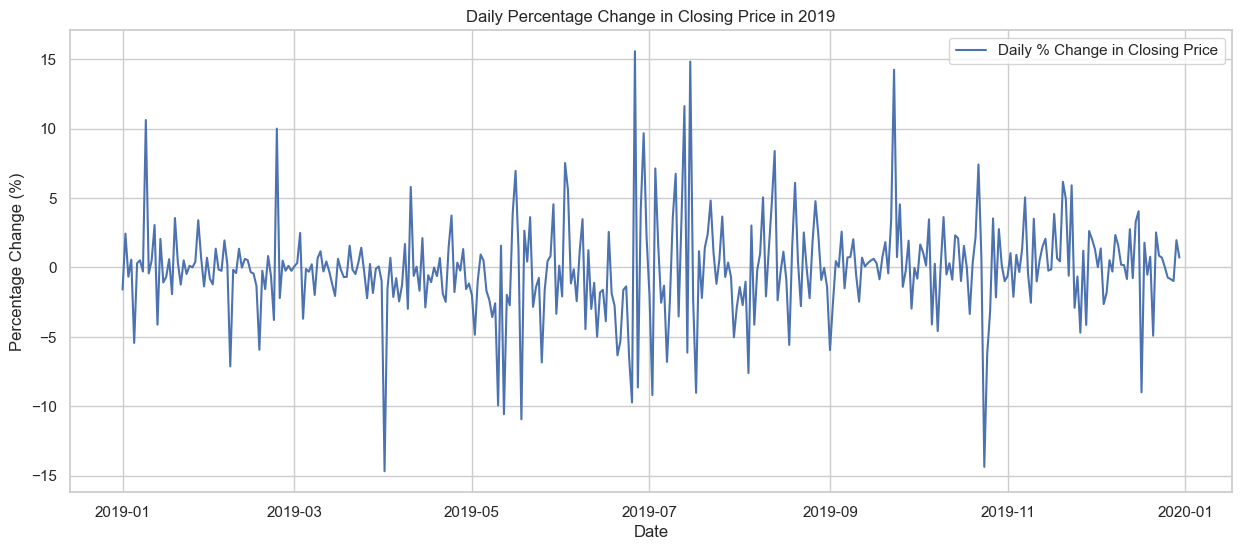

,date,daily_pct_change
396,2019-12-31,NaN
397,2019-12-30,0.705606
398,2019-12-29,1.963014
399,2019-12-28,-0.975875
400,2019-12-27,-0.839240


In [108]:
# Filter data for 2019 and calculate daily percentage change in closing price
data_2019 = data[data['date'].dt.year == 2019]
data_2019['daily_pct_change'] = data_2019['close_USD'].pct_change() * 100

# Plot the daily percentage change for 2019
plt.figure(figsize=(15, 6))
plt.plot(data_2019['date'], data_2019['daily_pct_change'], label='Daily % Change in Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Daily Percentage Change in Closing Price in 2019')
plt.legend()
plt.show()

# Show the first few rows of the data
data_2019[['date', 'daily_pct_change']].head()

C:\Users\zeml2\AppData\Local\Temp\ipykernel_22244\1582873766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['rolling_avg_close'] = data_2020['close_USD'].rolling(window=5).mean()


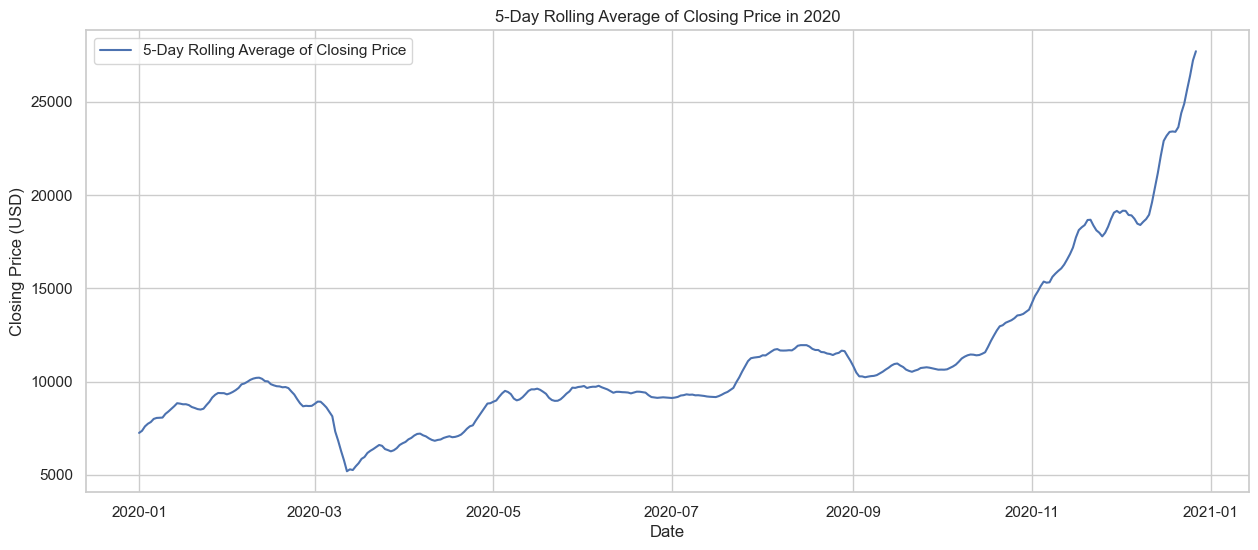

,date,rolling_avg_close
30,2020-12-31,NaN
31,2020-12-30,NaN
32,2020-12-29,NaN
33,2020-12-28,NaN
34,2020-12-27,27709.048
...,...,...
125,2020-09-27,10741.314
126,2020-09-26,10763.208
127,2020-09-25,10745.224
128,2020-09-24,10724.392


In [110]:
# Calculate the 5-day rolling average of the closing price for 2020
data_2020 = data[data['date'].dt.year == 2020]
data_2020['rolling_avg_close'] = data_2020['close_USD'].rolling(window=5).mean()

# Plot the 5-day rolling average for 2020
plt.figure(figsize=(15, 6))
plt.plot(data_2020['date'], data_2020['rolling_avg_close'], label='5-Day Rolling Average of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('5-Day Rolling Average of Closing Price in 2020')
plt.legend()
plt.show()

# Show the first few rows of the data
data_2020[['date', 'rolling_avg_close']].head(100)